## Correlation Analysis

In [1]:
import pandas as pd

In [2]:
train_path = '../feature_extracted_data/training_features_01.csv'
train_data = pd.read_csv(train_path)
train_data.shape

(51700, 560)

In [3]:
train_label_path = '../extracted_data/train_labels_full_with_columns.csv'
train_labels = pd.read_csv(train_label_path)
train_labels.shape

(51700, 3)

In [4]:
# train_data.head()

In [5]:
# train_labels.head()

In [6]:
mean_columns = [col for col in train_data.columns if '_mean' in col]
# mean_columns

In [7]:
mean_data = train_data[mean_columns]
# mean_data
sensors = ["AN311", "AN422", "AN423", "TP1721", "RH1722", "BA1723", 
           "TP1711", "RH1712", "BA1713", "MM252", "MM261", "MM262", 
           "MM263", "MM264", "MM256", "MM211", "CM861", "CR863", 
           "P_864", "TC862", "WM868", "AMP1_IR", "AMP2_IR", "DMP3_IR", 
           "DMP4_IR", "AMP5_IR", "F_SIDE", "V"]

# Create a new DataFrame to store the average of mean values for each sensor
averaged_data = pd.DataFrame()

for sensor in sensors:
    # Construct column names for each sensor's mean values across the five windows
    mean_columns = [f"{sensor}_window_{i}_mean" for i in range(1, 6)]
    
    # Ensure the column exists in the data, filter columns, and calculate their mean
    valid_columns = [col for col in mean_columns if col in mean_data.columns]
    if valid_columns:  # Check if there are any valid columns to calculate
        averaged_data[f"{sensor}_mean"] = mean_data[valid_columns].mean(axis=1)

# Now, 'averaged_data' contains the average of the mean values for each sensor
averaged_data.head()

,AN311_mean,AN422_mean,AN423_mean,TP1721_mean,RH1722_mean,BA1723_mean,TP1711_mean,RH1712_mean,BA1713_mean,MM252_mean,...,P_864_mean,TC862_mean,WM868_mean,AMP1_IR_mean,AMP2_IR_mean,DMP3_IR_mean,DMP4_IR_mean,AMP5_IR_mean,F_SIDE_mean,V_mean
0,3.371500,1.673833,1.436667,24.653167,42.000000,1097.344667,27.234833,54.0,1096.848667,0.1,...,0.0,0.0,0.0,5.0,4.653333,5.290000,4.0,0.0,0.0,0.0
1,3.367000,1.675667,1.437833,24.656167,42.038333,1097.384667,27.224833,54.0,1096.890000,0.1,...,0.0,0.0,0.0,5.0,4.666667,5.293333,4.0,0.0,0.0,0.0
2,3.362667,1.678000,1.441167,24.662500,42.138333,1097.424667,27.214833,54.0,1096.930000,0.1,...,0.0,0.0,0.0,5.0,4.660000,5.298333,4.0,0.0,0.0,0.0
3,3.374833,1.682833,1.440000,24.665667,42.231667,1097.464667,27.204833,54.0,1096.977500,0.1,...,0.0,0.0,0.0,5.0,4.671667,5.291667,4.0,0.0,0.0,0.0
4,3.379500,1.687167,1.442167,24.672167,42.331667,1097.504667,27.200000,54.0,1097.027167,0.1,...,0.0,0.0,0.0,5.0,4.680000,5.285000,4.0,0.0,0.0,0.0


In [8]:
train_df = averaged_data.join(train_labels['MM263'])
train_df['MM263'] = train_df['MM263'].map({'normal': 0, 'warning': 1})
train_df.shape

(51700, 29)

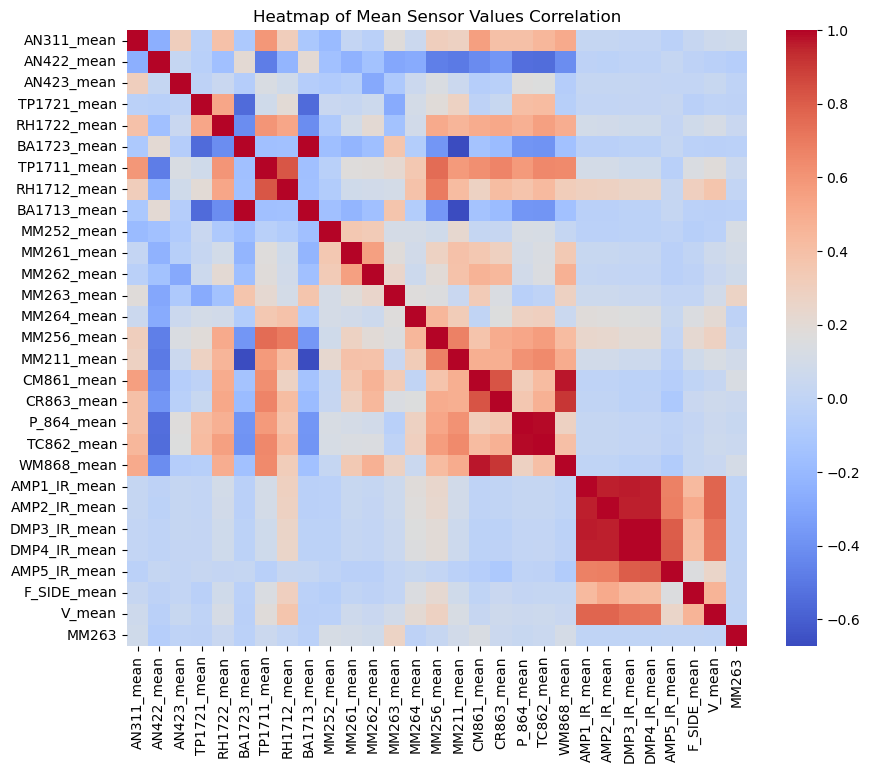

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_df.corr()
# correlation_matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Mean Sensor Values Correlation')
plt.show()


In [10]:
# Recompute the heatmap with the save option
plt.figure(figsize=(12, 12))
heatmap_plot = sns.heatmap(correlation_matrix, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Mean Sensor Values and MM263 Correlation')

# Saving the plot to a file
heatmap_file_path = 'heatmap_correlation.png'
plt.savefig(heatmap_file_path)
plt.close()  # Close the plot to prevent it from displaying in the output

# Provide the path to the saved file
heatmap_file_path


'heatmap_correlation.png'